# Hubble constant of type Ia Supernovae
Author: (insert name after submission)

Last updated: 13th of November, 2022

The aim of this notebok is to create a weighted amd unweighted line of best fit for recession velociy against distance. I will firstly use Pyhon's inbuilt functions to generate the gradient and y-intercept and then work out the gradient and y-intercept using equations in the Data Analysis Booklet (Llorente-Garcia 2021) and Hughes and Hase (Hughes 2010).

A goodness of fit analysis will then be carried out to find the $X^2$ value of the weighted and unweighted fits.

We will then calculate Hubble's constant for type Ia Supernovae.


Notebook completed under the guiddance of *PHAS0007 Reading Week Assignment 2022: Using least-squares fitting to calculate the Hubble constant* (Chislett 2022)

## Introduction
Edward Hubble (Hubble 1929) found that distance to astronomical bodies and their recession velocity are proportional. They are linked by Hubble's law and the following equation:

$v = H_0 D$, where $H_0$ is Hubble's constant.

This notebook will be using distances and recession velocities of type Ia Supernovae (SNe) to calculate Hubble's constant. 

Given that astronomical distances are not simple to calculate, the majority of the uncertainty will originate from the uncertainty in the distances. As a result, we will be plotting distance against velocity to allow us to calculate residuals and a $X^2_{Reduced}$ value. Therefore, Hubble's law will be rearranged to the following:

$$D = \frac{1}{H_0} v$$

Lining up this equation with $y=mx+c$, we can see that the gradient ($m$) will be the inverse of Hubble's constant.

In [1]:
#imported packages for plotting
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#for gaussian distribution
import scipy.stats as stats
import math

In [2]:
#importing data
velocity_kms,distance_mpc,error_distance_mpc=np.loadtxt("hubble_data.csv", delimiter=',', unpack=True)

#set degree of best fit
degree=1

#length of data set
n=len(distance_mpc)

## Raw data
The following is a plot of the raw data provided by the Join Light Curve Analysis (JLA) of the SDSS-II and SNLS supernova samples (Betoule et al. 2014).

We can immediately tell that as recession velocity increases, so does the distance to the astronomical bodies. We can also observe that as distances increase, so do the uncertainties in the distance. This is intuitavely logical because the further objects are the more uncertain we are about their exact position.

<IPython.core.display.Javascript object>


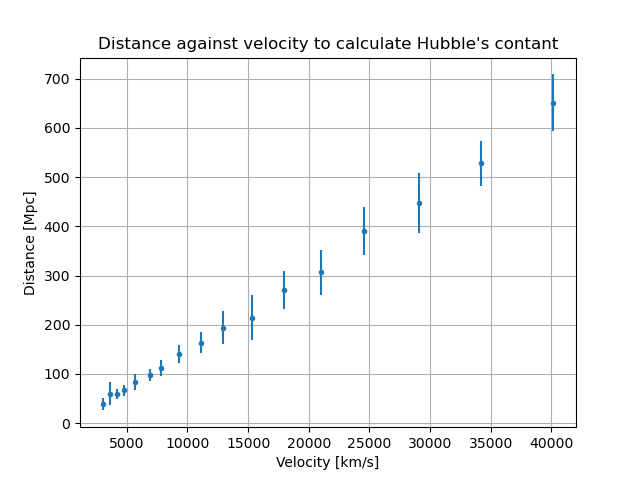

<ErrorbarContainer object of 3 artists>

In [3]:
#setting up plot
plt.figure()
plt.grid()
plt.title("Distance against velocity to calculate Hubble's contant")
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]")

#plot data points
plt.errorbar(velocity_kms,distance_mpc,yerr=error_distance_mpc,fmt='.',label="Raw data")

## Processed data
NumPy and the least squares polynomial fit was used find the gradient and y-intercept in both a weighted and an unweighted fit.

In [4]:
#finding gradient and y-intercept without weighting
coeffs_uw, errors_uw = np.polyfit(velocity_kms, distance_mpc, degree, cov=True)

#using covarriance matrix to find gradient, y-intercept, and errors of those.
m_uw, c_uw = coeffs_uw
dm_uw, dc_uw = np.sqrt(np.diag(errors_uw))

#output line of best fit for unweighted
print("Line of UNWEIGHTED best fit:")
print(f"gradient (m) = {m_uw} +- {dm_uw} Mpc/Km/s")
print(f"y-intercept (c) = {c_uw} +- {dc_uw} Mpc")

#errors should be to  signiicant figue and value should match the precision
print("\ngradient and y-intercept to correct precision")
print(f"gradient (m) = {m_uw:.4f} +- {dm_uw:.4f} Mpc/Km/s")
print(f"y-intercept (c) = {c_uw:.1f} +- {dc_uw:.1f} Mpc")

Line of UNWEIGHTED best fit:
gradient (m) = 0.01597939731196561 +- 0.0002206588105827228 Mpc/Km/s
y-intercept (c) = -11.624040905828377 +- 4.078725830535066 Mpc

gradient and y-intercept to correct precision
gradient (m) = 0.0160 +- 0.0002 Mpc/Km/s
y-intercept (c) = -11.6 +- 4.1 Mpc


In [5]:
#finding fradient and y-intercept with weighting
coeffs_w, errors_w = np.polyfit(velocity_kms, distance_mpc, degree, w=1/error_distance_mpc, cov='unscaled')

#using covarriance matrix to find gradient, y-intercept, and errors of those.
m_w, c_w = coeffs_w
dm_w, dc_w = np.sqrt(np.diag(errors_w))

#output line of best fit for weighted
print("Line of WEIGHTED best fit:")
print(f"gradeint (m) = {m_w} +- {dm_w} Mpc/Km/s")
print(f"y-intercept (c) = {c_w} +- {dc_w} Mpc")

#errors should be to  signiicant figue and value should match the precision
print("\ngradient and y-intercept to correct precision")
print(f"gradeint (m) = {m_w:.3f} +- {dm_w:.3f} Mpc/Km/s")
print(f"y-intercept (c) = {c_w:.1f} +- {dc_w:.1f} Mpc")

Line of WEIGHTED best fit:
gradeint (m) = 0.01574034318901381 +- 0.000827025757910185 Mpc/Km/s
y-intercept (c) = -8.32585537874202 +- 7.37387236367192 Mpc

gradient and y-intercept to correct precision
gradeint (m) = 0.016 +- 0.001 Mpc/Km/s
y-intercept (c) = -8.3 +- 7.4 Mpc


For gradient values: the errors were displayed to 1 significant figure and the gradients were rounded to the same precision.

For y-intercept values: the errors were displayed to 2 significant figure given that they are integer values. The y-intercept values were rounded to the same precision.

<IPython.core.display.Javascript object>


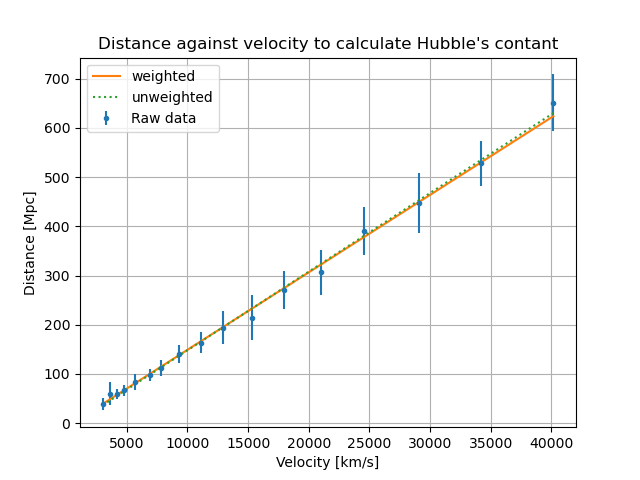

In [6]:
#set up graph
plt.figure()
plt.grid()
plt.title("Distance against velocity to calculate Hubble's contant")
plt.ylabel("Distance [Mpc]")
plt.xlabel("Velocity [km/s]")

#plot data points
plt.errorbar(velocity_kms,distance_mpc,yerr=error_distance_mpc,fmt='.',label="Raw data")

#plot weighted line
plt.plot(velocity_kms,m_w*velocity_kms+c_w,'-',label='weighted')

#plot unweighted line
plt.plot(velocity_kms,m_uw*velocity_kms+c_uw,':',label='unweighted')


plt.legend()

### Linear regression from scatch
I will now calculate the gradient and y-intercept from scratch using equations compiled by PHAS0007 Supplmentary notebook (Dash 2022) and found in the Data Analysis Booklet (Llorente-Garcia 2021) and Hughes and Hase (Hughes 2010).

#### Unweighted calculations
For my unweighted calculations, I will use the following equations:

Equation 1 (gradient):
$$m=\frac{\sum_{i=1}^n(x_i-\bar{x})y_i}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Equation 2 (y-intercept):
$$c=\bar{y}-m\bar{x}$$

Equation 3 (gradient uncertainty):
$$\Delta m = \sqrt{\frac{S}{(n-2)D}}$$

Equation (y-intercept uncertainty):
$$\Delta c = \sqrt{\left( \frac{1}{n}+\frac{\bar{x}^2}{D} \right)
\frac{S}{(n-2)}}$$

Where S is the sum of the square of the residuals and D is found using the following equation:
$$D=\sum_{i=1}^n (x_i-\bar{x})^2$$

In [7]:
#average velocities
velocity_mean = np.mean(velocity_kms)
#average distances
distances_mean = np.mean(distance_mpc)

#calculate gradient using equation 1
m_uw_scratch = (np.sum((velocity_kms - velocity_mean)*distance_mpc))/(np.sum((velocity_kms - velocity_mean)**2))
#calculate y-intercept using equation 2
c_uw_scratch = distances_mean - m_uw_scratch*velocity_mean

#calculate D
d = np.sum((velocity_kms - velocity_mean)**2)
#calculate S (residuals)
s_residuals = np.sum((distance_mpc-m_uw_scratch*velocity_kms-c_uw_scratch)**2)

#uncertainty in gradient using equation 3
dm_uw_scratch = np.sqrt(s_residuals/((n-2)*d))
#uncertainty in y-intercept using equation 4
dc_uw_scratch = np.sqrt(((1/n)+(velocity_mean**2/d))*(s_residuals/(n-2)))



#output line of best fit for unweighted
print("Line of UNWEIGHTED best fit:")
print(f"gradient (m) = {m_uw_scratch} +- {dm_uw_scratch} Mpc/Km/s")
print(f"y-intercept (c) = {c_uw_scratch} +- {dc_uw_scratch} Mpc")

#errors should be to  signiicant figue and value should match the precision
print("\ngradient and y-intercept to correct precision")
print(f"gradient (m) = {m_uw_scratch:.4f} +- {dm_uw_scratch:.4f} Mpc/Km/s")
print(f"y-intercept (c) = {c_uw_scratch:.1f} +- {dc_uw_scratch:.1f} Mpc")

Line of UNWEIGHTED best fit:
gradient (m) = 0.015979397311965605 +- 0.00022065881058272276 Mpc/Km/s
y-intercept (c) = -11.624040905828451 +- 4.078725830535065 Mpc

gradient and y-intercept to correct precision
gradient (m) = 0.0160 +- 0.0002 Mpc/Km/s
y-intercept (c) = -11.6 +- 4.1 Mpc


#### Weighted calculations
For my weighted calculations, I will use the following equations:

Equation 5 (weighting):
$$w_i = \frac{1}{(\Delta y_i)^2}$$

Equation 6 (gradient):
$$
m = \frac
{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i y_i}
{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i\right)^2}
$$

Equation 7 (y-intercept):
$$
c = \frac
{\sum_{i=1}^n w_i y_i - m\sum_{i=1}^n w_i x_i}
{\sum_{i=1}^n w_i}
$$

Equation 8 (gradient uncertainty):
$$
\Delta m = \sqrt{\frac{
\sum_i w_i
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$

Equation 9 (y-intercept uncertainty):
$$
\Delta c = \sqrt{\frac{
\sum_i w_i x_i^2
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$

In [8]:
#finding weighting using equation 5
wi = 1/(error_distance_mpc**2)

#calculate weighting
sum_wi = np.sum(wi)

#calculate gradient using equation 6
m_w_scratch_top = sum_wi*np.sum(wi*velocity_kms*distance_mpc)-np.sum(wi*velocity_kms)*np.sum(wi*distance_mpc)
m_w_scratch_bot = sum_wi*np.sum(wi*velocity_kms**2)-np.sum(wi*velocity_kms)**2
m_w_scratch = m_w_scratch_top/m_w_scratch_bot
#calculate y-intercept using equation 7
c_w_scratch = (np.sum(wi*distance_mpc)-m_w_scratch*np.sum(wi*velocity_kms))/sum_wi

#calculate gradient uncertainty using equation 8
dm_w_scratch = np.sqrt(sum_wi/(np.sum(wi)*np.sum(wi*velocity_kms**2)-np.sum(wi*velocity_kms)**2))
#calculate y-intercept uncertainty using equation 9
dc_w_scratch = np.sqrt(np.sum(wi*velocity_kms**2)/(sum_wi*np.sum(wi*velocity_kms**2)-np.sum(wi*velocity_kms)**2))



#output line of best fit for weighted
print("Line of WEIGHTED best fit:")
print(f"gradeint (m) = {m_w_scratch} +- {dm_w_scratch} Mpc/Km/s")
print(f"y-intercept (c) = {c_w_scratch} +- {dc_w_scratch} Mpc")

#errors should be to  signiicant figue and value should match the precision
print("\ngradient and y-intercept to correct precision")
print(f"gradeint (m) = {m_w_scratch:.4f} +- {dm_w_scratch:.4f} Mpc/Km/s")
print(f"y-intercept (c) = {c_w_scratch:.1f} +- {dc_w_scratch:.1f} Mpc")

Line of WEIGHTED best fit:
gradeint (m) = 0.01574034318901382 +- 0.0008270257579101854 Mpc/Km/s
y-intercept (c) = -8.325855378742101 +- 7.37387236367192 Mpc

gradient and y-intercept to correct precision
gradeint (m) = 0.0157 +- 0.0008 Mpc/Km/s
y-intercept (c) = -8.3 +- 7.4 Mpc


### Linear regression from scatch reflection
Unweighted and weighted line of regression: The gradients and y-intercepts were the same regardless if equations were used or NumPy was used.

NumPy is the better method to use as the equations do not need to be written out making it faster and more efficient. However, it is interesting to see how NumPy generates the gradient and y-intercept. Using the equations also allows us to find $S$, the sum of the square of the residuals.

## Data analysis
I will be calculating the residuals to then calculate the $X^2_{reduced}$ values using the gradident and y-intercept calculated using NumPy.

<IPython.core.display.Javascript object>


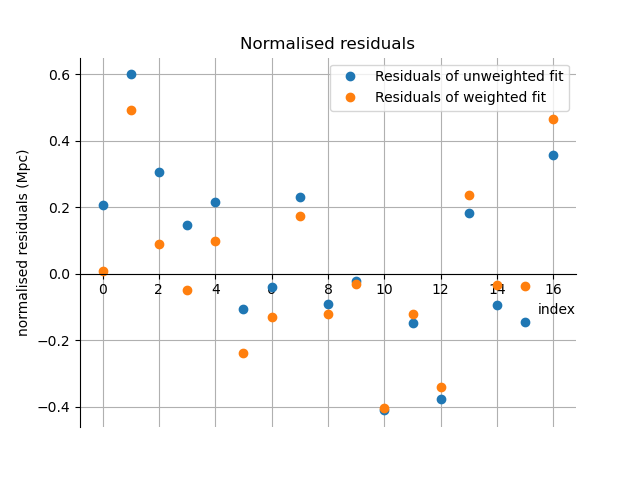

In [9]:
#calculate unweighted residuals based on distance
resid_uw=distance_mpc-velocity_kms*m_uw - c_uw
resid_uw_norm=resid_uw/error_distance_mpc

#calculate weighted residuals based on distance
resid_w=distance_mpc-velocity_kms*m_w - c_w
resid_w_norm=resid_w/error_distance_mpc


#plot residuals
plt.figure()
axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')
plt.grid()
plt.title("Normalised residuals")
plt.xlabel('index',loc='right')
plt.ylabel('normalised residuals (Mpc)')

plt.plot(resid_uw_norm,'o', label = "Residuals of unweighted fit")
plt.plot(resid_w_norm,'o', label = "Residuals of weighted fit")

plt.legend(loc="best")

### Residuals analysis
The graph above shows a relatively random spread of residuals. A case could be made that the residuals become smaller for the central data points and larger for the ends. However, a random spread is a stronger description.

As a result of a random spread, we can conclude that a straight-line fit is appropriate for this data.

I have then plotted a Gaussian distribution of each set of residuals. The weighted Gaussian distribution has a mean closer to 0, making it a more ideal data set. The standard deviations of the weighted normalised residuals is also smaller.

In [10]:
#unweighted mean and standard deviaiton
resid_uw_mean = np.mean(abs(resid_uw_norm))
resid_uw_std = np.std(resid_uw_norm)
print(f"Unweighted normalised residuals mean: {resid_uw_mean:.4f}")
print(f"Unweighted normalised residuals standard dev.: {resid_uw_std:.4f}")

#weighted mean and standard deviation
resid_w_mean = np.mean(abs(resid_w_norm))
resid_w_std = np.std(resid_w_norm)
print(f"\nWeighted normalised residuals mean: {resid_w_mean:.4f}")
print(f"Weighted normalised residuals standard dev.: {resid_w_std:.4f}")

Unweighted normalised residuals mean: 0.2161
Unweighted normalised residuals standard dev.: 0.2568

Weighted normalised residuals mean: 0.1802
Weighted normalised residuals standard dev.: 0.2363


<IPython.core.display.Javascript object>


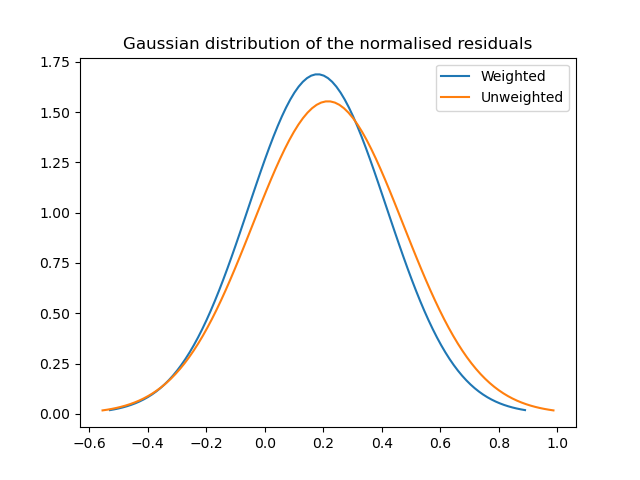

In [11]:
#plot gaussian of residuals
x_w = np.linspace(resid_w_mean - 3*resid_w_std, resid_w_mean + 3*resid_w_std, 100)
x_uw = np.linspace(resid_uw_mean - 3*resid_uw_std, resid_uw_mean + 3*resid_uw_std, 100)

plt.figure()
plt.title("Gaussian distribution of the normalised residuals")
plt.plot(x_w, stats.norm.pdf(x_w, resid_w_mean, resid_w_std),label="Weighted")
plt.plot(x_uw, stats.norm.pdf(x_uw, resid_uw_mean, resid_uw_std),label="Unweighted")

plt.legend(loc="best")

## $X^2$ Calculation

In [12]:
#degrees of freedom
k=n-degree-1

#finding chi^2 of unweighted
x_2_uw = np.sum(resid_uw_norm**2)
print(f"unweighted X2: {x_2_uw:.4f}")

#finding chi^2 reduced
x_2_uw_reduced = x_2_uw/k
print(f"unweighted X2 reduced: {x_2_uw_reduced:.4f}")

#finding chi^2 of weighted
x_2_w = np.sum(resid_w_norm**2)
print(f"\nweighted X2: {x_2_w:.4f}")

#finding chi^2 reduced
x_2_w_reduced = x_2_w/k
print(f"weighted X2 reduced: {x_2_w_reduced:.4f}")

unweighted X2: 1.1598
unweighted X2 reduced: 0.0773

weighted X2: 0.9497
weighted X2 reduced: 0.0633


The $X^2_{Reduced}$ value is extremely small due to the extremely high error of the distances. The high error means that pretty much any model can be applied to this data set and most of the error bars would be crossed by the line of regression.

## Conclusion
We will now calculate Hubble's constant and the absolute uncertainty of Hubble's constant. The uncertainty will be found using the following equation:

$$\Delta H_0 = \frac{\Delta m}{m} \cdot H_0$$

Where $H_0$ is Hubble's constant and $m$ will be the unweighted and unweighted gradients calculated above.

In [13]:
#calculate hubble's constant
hc_uw= 1/m_uw
hc_w = 1/m_w

#calculate absolute uncertainty of hubble's constant
hc_uw_error = (dm_uw/m_uw)*hc_uw
hc_w_error = (dm_w/m_w)*hc_w


print(f"Unweighted hubble's constant: {hc_uw:.1f} +/- {hc_uw_error:.1f} km/s/Mpc")
print(f"Weighted hubble's constant: {hc_w:.1f} +/- {hc_w_error:.1f} km/s/Mpc")

Unweighted hubble's constant: 62.6 +/- 0.9 km/s/Mpc
Weighted hubble's constant: 63.5 +/- 3.3 km/s/Mpc


We have now found two values for Hubble's constant. The value generated through a weighted fit is a more accurate value. Although its error is larger, the weighted value takes into consideration the error of the raw data. It is also closer to the literature value of 69.8 km/s/Mpc (Warren 2022). 


This value shows that further objects are moving further away from us at a faster rate. This is clear empirical evidence that the universe is expanding at an accelerating rate.

## References
Betoule, M., Kessler, R., Guy, J., Mosher, J., Hardin, D., Biswas, R., Astier, P., El-Hage, P., Konig, M., Kuhlmann, S., Marriner, J., Pain, R., Regnault, N., Balland, C., Bassett, B. A., Brown, P. J., Campbell, H., Carlberg, R. G., Cellier-Holzem, F., Cinabro, D., Conley, A., D'Andrea, C. B., DePoy, D. L., Doi, M., Ellis, R. S., Fabbro, S., Filippenko, A. V., Foley, R. J., Frieman, J. A., Fouchez, D., Galbany, L., Goobar, A., Gupta, R. R., Hill, G. J., Hlozek, R., Hogan, C. J., Hook, I. M., Howell, D. A., Jha, S. W., Le Guillou, L., Leloudas, G., Lidman, C., Marshall, J. L., Moller, A., Mourao, A. M., Neveu, J., Nichol, R., Olmstead, M. D., Palanque-Delabrouille, N., Perlmutter, S., Prieto, J. L., Pritchet, C. J., Richmond, M., Riess, A. G., Ruhlmann-Kleider, V., Sako, M., Schahmaneche, K., Schneider, D. P., Smith, M., Sollerman, J., Sullivan, M., Walton, N. A., and Wheeler, C. J. (2014). Improved cosmological constraints from a joint analysis of the SDSS-II and SNLS supernova samples. Astronomy and Astrophysics, 568:A22. https://doi.org/10.1051/0004-6361/201423413.

Chislett R, Dash L, Lemos P, Waugh B. *PHAS0007 Reading Week Assignment 2022: Using least-squares fitting to calculate the Hubble constant$. UCL; Last revised: November 4, 2022.

Dash L, Waugh B. *PHAS0007 Computing mid-term assignment: Supplementary notebook*. UCL; last updated: November 10, 2022.

Hubble, E. (1929). A *Relation between Distance and Radial Velocity among
Extra-Galactic Nebulae*. Contributions from the Mount Wilson Observatory,
3:23{28.

Hughes I, Hase T. *Measurements and their uncertainties. A practical guide to modern error analysis.* Oxford University Press; 2010.

Llorente-Garcia I and Jones P. *Data Analysis and Statistics Booklet, Practical Physics and Computing 1: Module PHAS0007.* UCL: London; 2021 Accessed 23 September 2022. Available from: https://moodle.ucl.ac.uk/mod/resource/view.php?id=4305408

Warren Sasha. *The Hubble constant, explained* UChicago News. Accessed 11 November 2022. Avaliable from: https://news.uchicago.edu/explainer/hubble-constant-explained#:~:text=The%20most%20recent%20precise%20measurements,74%20km%2Fs%2FMpc.